In [51]:
import os
import re

from doctr.models import ocr_predictor
from doctr.io import DocumentFile

screenshots_dir = "Projects/washing_machines_ilive/screenshots/Screenshots/"

# Lists all files inside the directory
files = [screenshots_dir + f for f in os.listdir(screenshots_dir)]

model = ocr_predictor(
    det_arch="db_mobilenet_v3_large", reco_arch="crnn_mobilenet_v3_large", pretrained=True
)

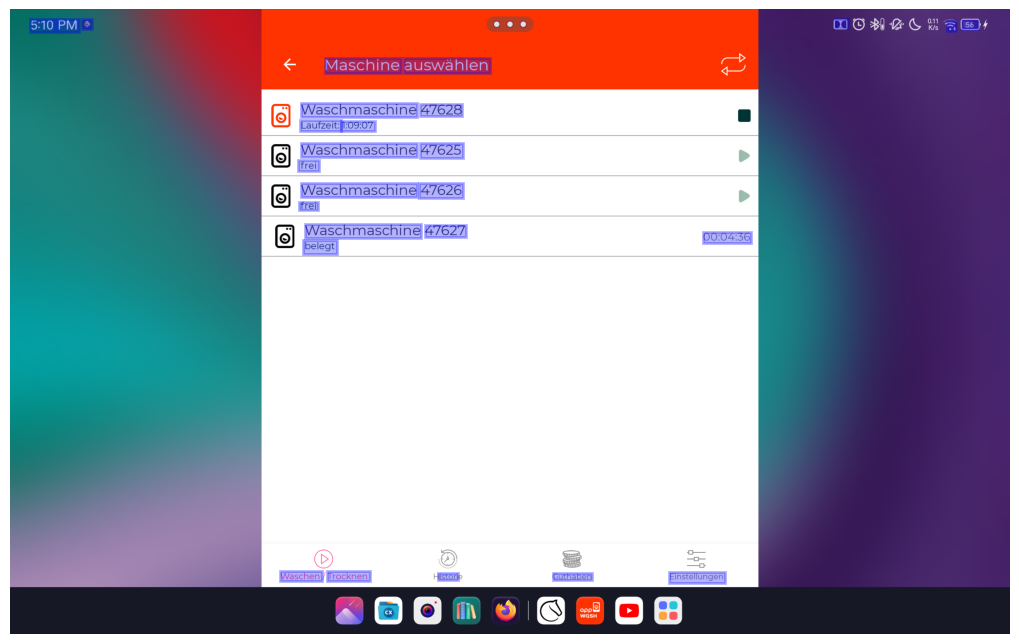

In [54]:
result = model(
    DocumentFile.from_images(
        "Projects/washing_machines_ilive/screenshots/Screenshot_20240630-171027.png"
    )
)
result.show()

In [58]:
for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                print(word.value)

5:10
PM
e
D0
a
56
Maschine
auswahlen
Waschmaschine
47628
Laufzeit:
1:09:07
Waschmaschine
47625
frei
Waschmaschine
47626
frei
Waschmaschine
47627
belegt
00:04:36
Waschen
Trocknen
listori
Guthaben
Einstellungen


In [68]:
appliances = []

appliances_types = []
appliances_numbers = []
appliances_status = []
appliances_times = []

list_appliances_types = ["Waschmaschine", "Trockner"]
regex_applances_numbers = r"\b\d{5}\b"
list_appliances_in_use = ["belegt", "frei", "Laufzeit:"]
regex_applances_times = r".*\d{1}:\d{2}:\d{2}"

for page in result.pages:
    for block in page.blocks:
        for line in block.lines:
            for word in line.words:
                if word.value in list_appliances_types:
                    appliances_types.append(word.value)
                if word.value in list_appliances_in_use:
                    appliances_status.append(word.value)
                if re.search(regex_applances_numbers, word.value):
                    appliances_numbers.append(word.value)
                if re.search(regex_applances_times, word.value):
                    appliances_times.append(word.value)

for i in range(len(appliances_numbers)):
    appliances.append(
        {
            "type": appliances_types[i],
            "status": appliances_status[i],
            "number": appliances_numbers[i],
        }
    )

for i in appliances:
    if i.get("status") in ["belegt", "Laufzeit:"]:
        i["time"] = appliances_times.pop(0)

assert appliances_times == []

appliances

[{'type': 'Waschmaschine',
  'status': 'Laufzeit:',
  'number': '47628',
  'time': '1:09:07'},
 {'type': 'Waschmaschine', 'status': 'frei', 'number': '47625'},
 {'type': 'Waschmaschine', 'status': 'frei', 'number': '47626'},
 {'type': 'Waschmaschine',
  'status': 'belegt',
  'number': '47627',
  'time': '00:04:36'}]